<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS458 Research Assignment 1:
<br>
This first assignment deals with neural networks for classification of images. The structure of the network should be simple, with only one internal/hidden layer. The intent of the assignment is to get hands-on, practical experience with not only designing, training, and assessing a neural network, and interpreting the impact of hyperparameters, but to go one step further. The data set used with be the MINST data provided by TensorFlow.

## Import Packages 

In [234]:
# Helper libraries
from IPython import display 
import datetime
from packaging import version
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
#from plot_keras_history import plot_history

In [2]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [3]:
# Verify TensorFlow Version and Keras Version
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.1.0


In [4]:
print("Keras version: ", keras.__version__)

Keras version:  2.2.4-tf


## Loading MNIST Dataset

In [5]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

# EDA
***

In [6]:
# Checking shape
print('x_train:\t{}'.format(x_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


### Review labels for training dataset

In [7]:
print("First ten labels training dataset:\n {}\n".format(y_train[0:10]))

First ten labels training dataset:
 [5 0 4 1 9 2 1 3 1 4]



### Plot Examples

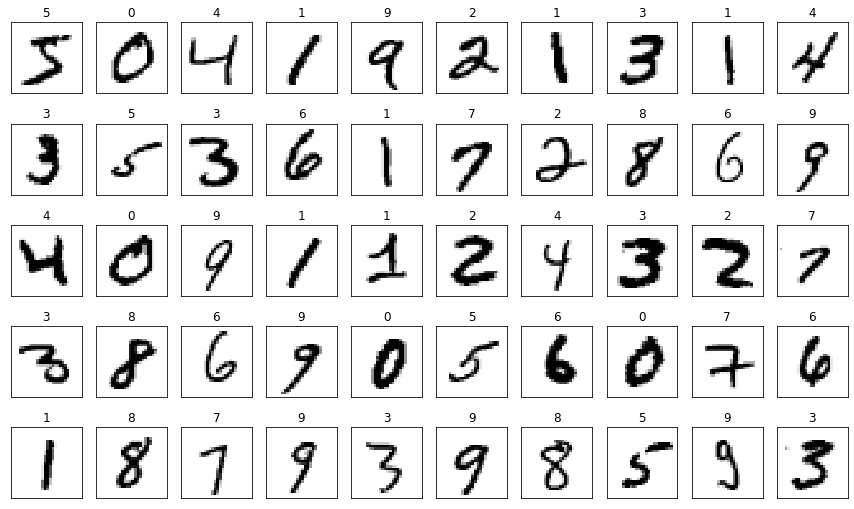

In [8]:
fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap='binary')

# Preprocessing Data
***

### One Hot Encoding Labels

In [9]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("First ten entries of y_train:\n {}\n".format(y_train[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_train_encoded[0:10,]))

First ten entries of y_train:
 [5 0 4 1 9 2 1 3 1 4]

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [10]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


### Preprocessing the Examples
Numpy to unroll the examples from (28, 28) arrays to (784, 1) vectors

Shape before reshape

In [11]:
print('x_train:\t{}'.format(x_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))

x_train:	(60000, 28, 28)
x_test:		(10000, 28, 28)


Shape after reshape

In [12]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [13]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [14]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(x_train[2020]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 167 208  19   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13 235 254  99   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  74 254 234   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 154 254 145   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 224 254  92   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51 245 211  13   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2 169 254 101   0   0   0   0   0   

### Normalizing Values
Dividing by 255 to get all values between 0 and 1

In [15]:
x_train_norm = x_train_reshaped.astype('float32') / 255
x_test_norm = x_test_reshaped.astype('float32') / 255

In [16]:
print(set(x_train_norm[0]))

{0.0, 0.011764706, 0.53333336, 0.07058824, 0.49411765, 0.6862745, 0.101960786, 0.6509804, 1.0, 0.96862745, 0.49803922, 0.11764706, 0.14117648, 0.36862746, 0.6039216, 0.6666667, 0.043137256, 0.05490196, 0.03529412, 0.85882354, 0.7764706, 0.7137255, 0.94509804, 0.3137255, 0.6117647, 0.41960785, 0.25882354, 0.32156864, 0.21960784, 0.8039216, 0.8666667, 0.8980392, 0.7882353, 0.52156866, 0.18039216, 0.30588236, 0.44705883, 0.3529412, 0.15294118, 0.6745098, 0.88235295, 0.99215686, 0.9490196, 0.7647059, 0.2509804, 0.19215687, 0.93333334, 0.9843137, 0.74509805, 0.7294118, 0.5882353, 0.50980395, 0.8862745, 0.105882354, 0.09019608, 0.16862746, 0.13725491, 0.21568628, 0.46666667, 0.3647059, 0.27450982, 0.8352941, 0.7176471, 0.5803922, 0.8117647, 0.9764706, 0.98039216, 0.73333335, 0.42352942, 0.003921569, 0.54509807, 0.67058825, 0.5294118, 0.007843138, 0.31764707, 0.0627451, 0.09411765, 0.627451, 0.9411765, 0.9882353, 0.95686275, 0.83137256, 0.5176471, 0.09803922, 0.1764706}


# Running Our Experiments
***

## Experiment 1
Our dense neural network will consist of 784 input nodes, a hidden layer with 1 node and 10 output nodes (corresponding to the 10 digits). We use mnist.load_data() to get the 70,000 images divided into a set of 60,000 training images and 10,000 test images. We hold back 5,000 of the 60,000 training images for validation.

In [17]:
model_1 = Sequential([
    Dense(input_shape=[784], units = 1, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
output_layer (Dense)         (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


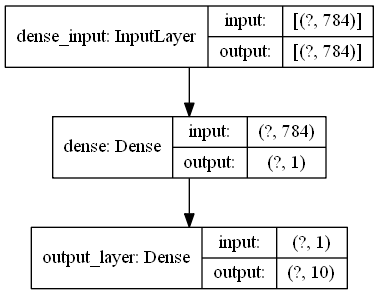

In [19]:
keras.utils.plot_model(model_1, "mnist_model.png", show_shapes=True) 

In [20]:
#Compiling the model
model_1.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

### Training the model

In [231]:
start = datetime.now()
history_1 = model_1.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.083 
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )
end = datetime.now()
print(end-start)

Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 3s 56us/sample - loss: 1.6429 - accuracy: 0.3641 - val_loss: 1.6150 - val_accuracy: 0.3703
Epoch 2/200
55020/55020 [==============================] - 3s 49us/sample - loss: 1.6376 - accuracy: 0.3670 - val_loss: 1.6105 - val_accuracy: 0.3783
Epoch 3/200
55020/55020 [==============================] - 3s 48us/sample - loss: 1.6338 - accuracy: 0.3689 - val_loss: 1.6062 - val_accuracy: 0.3938
Epoch 4/200
55020/55020 [==============================] - 2s 43us/sample - loss: 1.6295 - accuracy: 0.3713 - val_loss: 1.6035 - val_accuracy: 0.3765- loss: 1.6298 - accuracy: 0.37
Epoch 5/200
55020/55020 [==============================] - 2s 44us/sample - loss: 1.6268 - accuracy: 0.3718 - val_loss: 1.5967 - val_accuracy: 0.3900
0:00:13.380320


### Test the model

In [22]:
# Getting the probability values for each image, based on TEST data
preds_1 = model_1.predict(x_test_norm)
print('shape of preds: ', preds_1.shape)

shape of preds:  (10000, 10)


In [23]:
# Viewing example
preds_1[0]

array([0.   , 0.091, 0.205, 0.215, 0.006, 0.035, 0.   , 0.19 , 0.166, 0.091], dtype=float32)

In [24]:
# Getting the ultimate predicted classes based on TRAINING data
pred_classes_1 = np.argmax(model_1.predict(x_train_norm), axis=-1)
print('shape of pred_classes: ', pred_classes_1.shape)

shape of pred_classes:  (60000,)


In [25]:
#Viewing example
pred_classes_1[0]

8

In [26]:
# Getting ultimate accuracy score
loss_1, accuracy_1 = model_1.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy_1 * 100)

10000/10000 [==============================] - 0s 17us/sample - loss: 1.6253 - accuracy: 0.3691
test set accuracy:  36.91000044345856


Better than guessing (~10%) but still not that great.

### Model 1 Performance Metrics 

In [27]:
history_dict_1 = history_1.history
history_dict_1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
losses_1 = history_1.history['loss']
accs_1 = history_1.history['accuracy']
val_losses_1 = history_1.history['val_loss']
val_accs_1 = history_1.history['val_accuracy']
epochs_1 = len(losses_1)

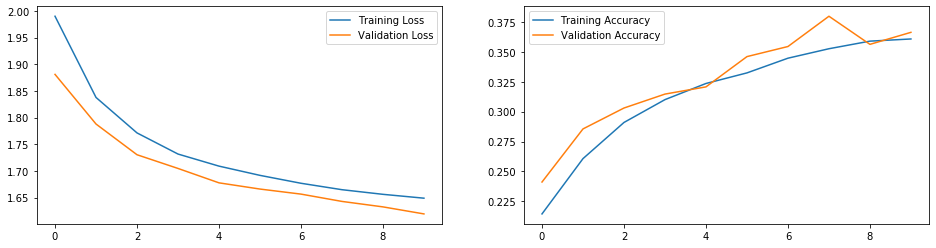

In [29]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_1, accs_1], [val_losses_1, val_accs_1], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_1), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_1), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model 1 Confusion Matrices

In [30]:
conf_mx_1 = tf.math.confusion_matrix(y_train, pred_classes_1)
conf_mx_1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[5093,    1,    3,    9,  395,   95,  232,    6,   16,   73],
       [   4, 6291,   17,  323,    6,    6,    1,   18,   49,   27],
       [ 166, 1118,  382, 1761,  190,  186,   47,  464, 1067,  577],
       [  32, 1395,  402, 2499,   81,   97,   15,  445,  837,  328],
       [1732,    6,   22,   82, 2029,  652,  628,   47,  170,  474],
       [ 532,   51,   57,  143, 1492, 1003,  320,   98,  486, 1239],
       [4915,    5,    7,   30,  388,  124,  227,   20,   77,  125],
       [ 126,  458,  562, 1755,  276,  261,   41,  582, 1392,  812],
       [ 168,  521,  331, 1082,  357,  374,   67,  428, 1372, 1151],
       [ 146,   27,  138,  289,  601, 1018,   63,  230, 1176, 2261]])>

In [31]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [32]:
df = pd.DataFrame(preds_1[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

,0,1,2,3,4,5,6,7,8,9
0,0.00%,9.09%,20.50%,21.50%,0.59%,3.53%,0.00%,18.99%,16.65%,9.14%
1,3.66%,0.24%,6.75%,4.76%,19.45%,20.48%,5.92%,8.95%,11.95%,17.84%
2,0.00%,48.34%,13.98%,20.22%,0.01%,0.24%,0.00%,9.69%,6.04%,1.48%
3,35.77%,0.01%,0.55%,0.31%,17.04%,7.31%,33.06%,0.87%,1.45%,3.63%
4,3.04%,0.27%,7.27%,5.18%,18.42%,20.35%,5.07%,9.54%,12.59%,18.27%
5,0.00%,77.50%,6.10%,10.82%,0.00%,0.02%,0.00%,3.52%,1.77%,0.26%
6,11.59%,0.07%,3.42%,2.23%,24.49%,18.29%,15.14%,4.87%,7.06%,12.84%
7,0.00%,6.96%,20.03%,20.22%,0.90%,4.54%,0.01%,19.21%,17.53%,10.60%
8,13.02%,0.06%,3.08%,1.99%,24.63%,17.65%,16.57%,4.43%,6.48%,12.08%
9,0.20%,1.33%,13.92%,11.48%,6.54%,13.64%,0.48%,16.03%,18.13%,18.26%


None of the records get very high levels of confidence for any one number.

In [33]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

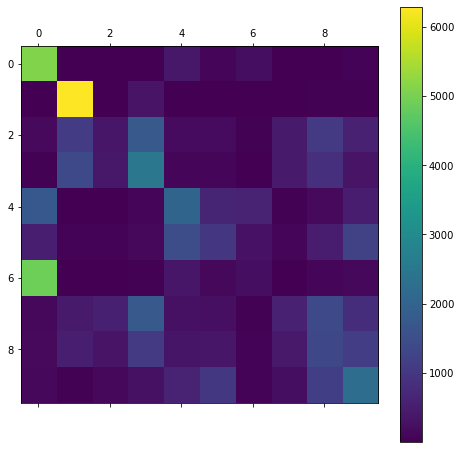

In [73]:
plot_confusion_matrix(conf_mx_1)

Note that the rows represent actual classes while the columns represent predicted classes.

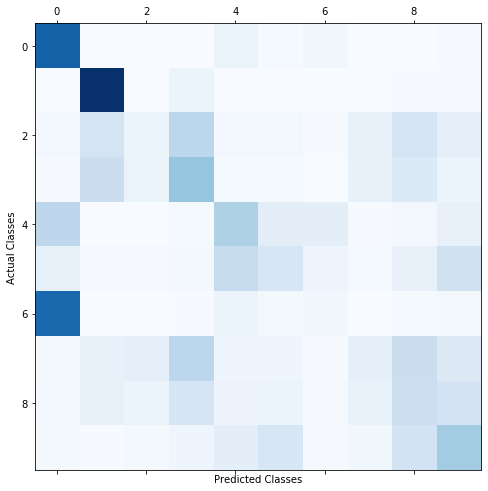

In [34]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx_1, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

Very poor predictions. We see no trace of a diagonal which would indicate correct predictions.

### Model 1 - Visualizing the Activation Values with a Boxplot

In [36]:
# Extracts the outputs of the 2 layers:
layer_outputs_1 = [layer.output for layer in model_1.layers]

# Creates a model that will return these outputs, given the model input:
activation_model_1 = models.Model(inputs=model_1.input, outputs=layer_outputs_1)

In [37]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations_1 = activation_model_1.predict(x_train_norm)
hidden_layer_activation_1 = activations_1[0]
output_layer_activations_1 = activations_1[1]
hidden_layer_activation_1.shape   #  each of the 128 hidden nodes has one activation value per training image

(60000, 1)

In [38]:
# Creating a dataframe with the activation values and predicted classes
# for use in a boxplot.
mod1_act = pd.DataFrame(data = hidden_layer_activation_1)
mod1_act = mod1_act.rename(columns = {0:'act_val'})

In [39]:
mod1_act.loc[:,'pred_class'] = pred_classes_1

In [40]:
mod1_act.head()

,act_val,pred_class
0,2.147122,8
1,0.000000,0
2,2.819676,7
3,5.415152,1
4,1.820608,9


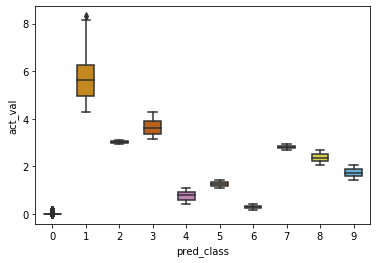

In [41]:
bplot = sns.boxplot(y='act_val', x='pred_class', 
                 data=mod1_act[['act_val','pred_class']], 
                 width=0.5,
                 palette="colorblind")

In [42]:
mod1_act.loc[:,'pred_class'].value_counts()

0    12914
1     9873
3     7973
9     7067
8     6642
4     5815
5     3816
7     2338
2     1921
6     1641
Name: pred_class, dtype: int64

### Model 1 Conclusions:
Clearly this isn't a very good model. Our test accuracy is dismal (in the 30's). This isn't that much better than just guessing randomly. We see a strong propensity to predict 0s and 1s and very few 2s and 6s. Let's see how things improve with another node in the hidden layer.

## Experiment 2
***
This time our dense neural network will have 784 input nodes, a hidden layer with **2 nodes** and 10 output nodes (corresponding to the 10 digits).

In [43]:
model_2 = Sequential([
    Dense(input_shape=[784], units = 2, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

In [44]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 1570      
_________________________________________________________________
output_layer (Dense)         (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


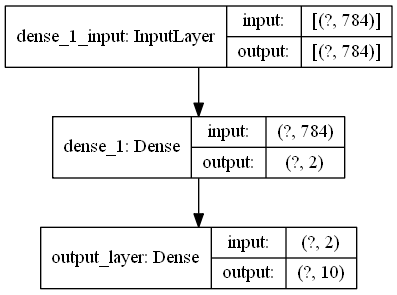

In [45]:
keras.utils.plot_model(model_2, "mnist_model.png", show_shapes=True) 

In [46]:
#Compiling the model
model_2.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

### Training Model 2

In [232]:
start = datetime.now()
history_2 = model_2.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.083 
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )
end = datetime.now()
print(end-start)

Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 2s 45us/sample - loss: 0.9777 - accuracy: 0.7028 - val_loss: 0.8827 - val_accuracy: 0.7185
Epoch 2/200
55020/55020 [==============================] - 3s 48us/sample - loss: 0.9760 - accuracy: 0.7040 - val_loss: 0.8757 - val_accuracy: 0.7213
Epoch 3/200
55020/55020 [==============================] - 3s 48us/sample - loss: 0.9742 - accuracy: 0.7039 - val_loss: 0.8737 - val_accuracy: 0.7275
Epoch 4/200
55020/55020 [==============================] - 3s 48us/sample - loss: 0.9721 - accuracy: 0.7055 - val_loss: 0.8832 - val_accuracy: 0.7112
Epoch 5/200
55020/55020 [==============================] - 3s 48us/sample - loss: 0.9708 - accuracy: 0.7046 - val_loss: 0.8693 - val_accuracy: 0.7251
0:00:13.187336


### Testing Model 2

In [48]:
# Getting the probability values for each image, based on TEST data
preds_2 = model_2.predict(x_test_norm)
print('shape of preds: ', preds_2.shape)

shape of preds:  (10000, 10)


In [49]:
# Getting the ultimate predicted classes based on TRAINING data
pred_classes_2 = np.argmax(model_2.predict(x_train_norm), axis=-1)
print('shape of pred_classes: ', pred_classes_2.shape)

shape of pred_classes:  (60000,)


In [50]:
# Getting ultimate accuracy score
loss_2, accuracy_2 = model_2.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy_2 * 100)

10000/10000 [==============================] - 0s 17us/sample - loss: 0.9772 - accuracy: 0.6991
test set accuracy:  69.91000175476074


### Model 2 Performance Metrics 

In [51]:
history_dict_2 = history_2.history
history_dict_2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [52]:
losses_2 = history_2.history['loss']
accs_2 = history_2.history['accuracy']
val_losses_2 = history_2.history['val_loss']
val_accs_2 = history_2.history['val_accuracy']
epochs_2 = len(losses_2)

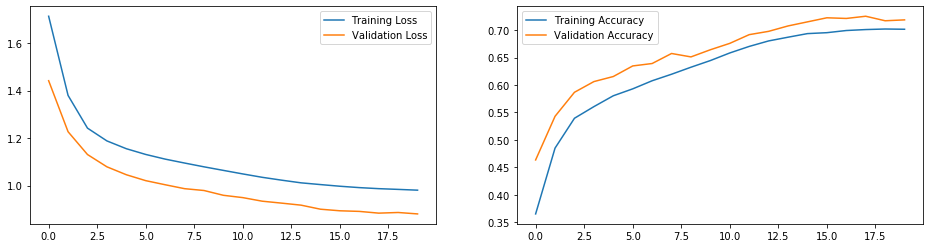

In [53]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_2, accs_2], [val_losses_2, val_accs_2], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_2), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_2), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

### Model 2 Scatter Plot
Here we're comparing the activation values for hidden nodes 1 and 2 and seeing how well they separate by predicted value. Ideally we'll see clearly delineated groups.

In [55]:
# Extracts the outputs of the 2 layers:
layer_outputs_2 = [layer.output for layer in model_2.layers]

# Creates a model that will return these outputs, given the model input:
activation_model_2 = models.Model(inputs=model_2.input, outputs=layer_outputs_2)

In [56]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations_2 = activation_model_2.predict(x_train_norm)
hidden_layer_activation_2 = activations_2[0]
output_layer_activations_2 = activations_2[1]
hidden_layer_activation_2.shape   #  each of the 128 hidden nodes has one activation value per training image

(60000, 2)

In [58]:
hidden_layer_activation_2[0]

array([7.022, 2.003], dtype=float32)

In [62]:
# Creating a dataframe with the activation values and predicted classes
# for use in a boxplot.
mod2_act = pd.DataFrame(data = hidden_layer_activation_2)
mod2_act = mod2_act.rename(columns = {0:'act_val0', 1: 'act_val1'})

In [63]:
mod2_act.head()

,act_val0,act_val1
0,7.022043,2.003037
1,4.922390,0.000000
2,0.255084,4.386291
3,3.259369,6.344818
4,0.000000,1.985476


In [64]:
mod2_act.loc[:,'pred_class'] = pred_classes_2

In [66]:
mod2_act.head()

,act_val0,act_val1,pred_class
0,7.022043,2.003037,0
1,4.922390,0.000000,0
2,0.255084,4.386291,4
3,3.259369,6.344818,1
4,0.000000,1.985476,9


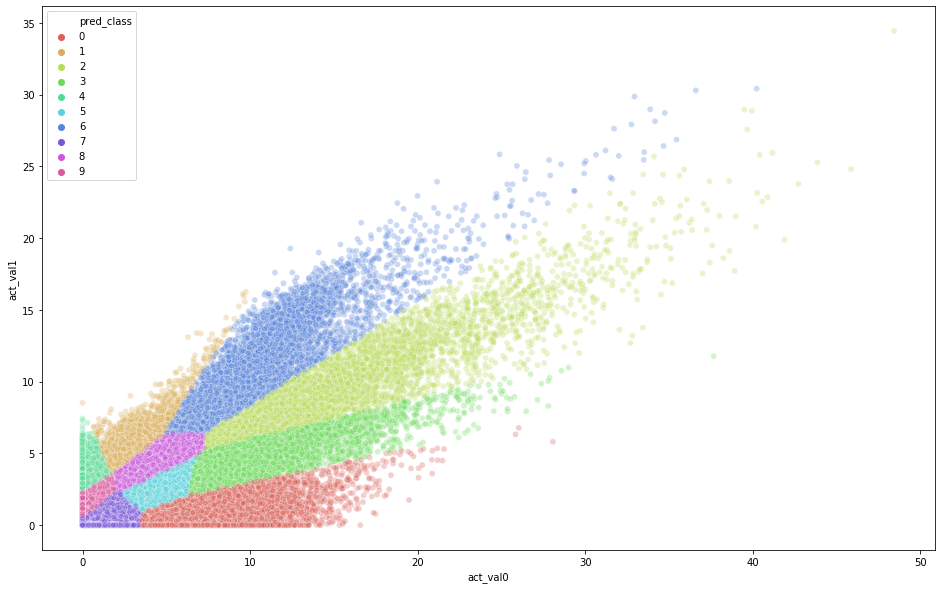

In [67]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="act_val0", y="act_val1",
    hue="pred_class",
    palette=sns.color_palette("hls", 10),
    data=mod2_act,
    legend="full",
    alpha=0.3
)

We do see a very clean segmentation of predicted values.

### Comparing Model 1 & 2

### Metrics:

In [71]:
print("Model 1 Accuracy: ", round(accuracy_1 * 100, 2))
print("Model 2 Accuracy: ", round(accuracy_2 * 100, 2))

Model 1 Accuracy:  36.91
Model 2 Accuracy:  69.91


In [72]:
print("Model 1 Loss: ", round(loss_1 * 100, 2))
print("Model 2 Loss: ", round(loss_2 * 100, 2))

Model 1 Loss:  162.53
Model 2 Loss:  97.72


### Confusion Matricies:

In [75]:
# Function for plotting confusion matrix heatmaps
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [76]:
# Creating confusion matrix for model 2
conf_mx_2 = tf.math.confusion_matrix(y_train, pred_classes_2)

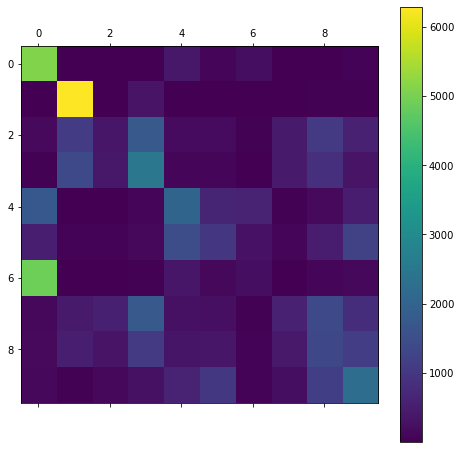

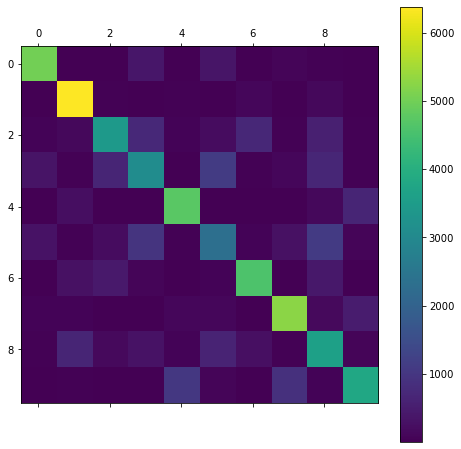

In [78]:
# Plotting confusion matricies for models one and two to compare
plot_confusion_matrix(conf_mx_1)
plot_confusion_matrix(conf_mx_2)

In [81]:
# showing the raw numbers
print("------------------ Model 1 ------------------")
print(conf_mx_1)
print("")
print("")
print("------------------ Model 2 ------------------")
print(conf_mx_2)

------------------ Model 1 ------------------
tf.Tensor(
[[5093    1    3    9  395   95  232    6   16   73]
 [   4 6291   17  323    6    6    1   18   49   27]
 [ 166 1118  382 1761  190  186   47  464 1067  577]
 [  32 1395  402 2499   81   97   15  445  837  328]
 [1732    6   22   82 2029  652  628   47  170  474]
 [ 532   51   57  143 1492 1003  320   98  486 1239]
 [4915    5    7   30  388  124  227   20   77  125]
 [ 126  458  562 1755  276  261   41  582 1392  812]
 [ 168  521  331 1082  357  374   67  428 1372 1151]
 [ 146   27  138  289  601 1018   63  230 1176 2261]], shape=(10, 10), dtype=int32)


------------------ Model 2 ------------------
tf.Tensor(
[[5016    4   19  383    7  353    1   87   42   11]
 [   1 6380   28   17   34    8  105   12  135   22]
 [  62  127 3421  725   59  213  722   30  571   28]
 [ 341   37  672 3105   18 1120   29  105  678   26]
 [   1  242   14   12 4749   12   16    7  136  653]
 [ 302   44  218  951   27 2333   64  295 1095   92]
 [   

**Findings:** <br>
It is very clear across all measures that adding another node to the hidden layer has increased the effectiveness. The accuracy almost doubled and the loss dropped substantially. 
The heatmap for model 1 shows little pattern. Our predictions are little better than random. We see a much better pattern in the second heatmap. We actually see a cleaner diagonal line which tells us the 2nd model is doing a better job at getting correct predictions.

## Experiment 3
***
I've now seen the effect that going from one node in a hidden layer to two nodes. I'm curious though where is the point of dimishing returns? We saw that going from one node to two almost doubled the accuracy but that pattern obviously can't continue forever. 
<br><br>
My plan here is to run a FOR loop testing models with increasing numbers on nodes. For the sake of time I'll run from 2 to 128 nodes increasing by 4 each run. This will give me 32 models and I can then plot the accuracy and loss metrics of these models. This should give me a good understanding of what effect more nodes has on the metrics.

In [139]:
def run_models(n):
    i = 2
    total_loss = []
    total_acc = []
    while i < n+1:
        # Build model
        model_i = Sequential([
            Dense(input_shape=[784], units = i, activation = tf.nn.relu),
            Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])
        
        # Compile
        model_i.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])
        
        # Fit
        history_i = model_i.fit(
            x_train_norm
            ,y_train_encoded
            ,epochs = 200
            ,validation_split=0.083
            ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])
        
        # Log accuracy/loss
        loss_i, accuracy_i = model_i.evaluate(x_test_norm, y_test_encoded)
        
        # Appending values
        total_loss.append(loss_i)
        total_acc.append(accuracy_i)
        
        # Increase number of nodes by 3
        i += 3
    return total_loss, total_acc
    

In [144]:
# Using our function above to run many models. Also checking the time so I know how long it took to run them all.
from datetime import datetime
start = datetime.now()
loss, acc = run_models(128)
end = datetime.now()
print("Elapsed time: ", end-start)

Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 2s 34us/sample - loss: 1.6922 - accuracy: 0.4236 - val_loss: 1.3846 - val_accuracy: 0.5277
Epoch 2/200
55020/55020 [==============================] - 2s 27us/sample - loss: 1.3430 - accuracy: 0.5298 - val_loss: 1.1927 - val_accuracy: 0.5637
Epoch 3/200
55020/55020 [==============================] - 1s 27us/sample - loss: 1.2336 - accuracy: 0.5515 - val_loss: 1.1179 - val_accuracy: 0.5817
Epoch 4/200
55020/55020 [==============================] - 2s 28us/sample - loss: 1.1804 - accuracy: 0.5701 - val_loss: 1.0674 - val_accuracy: 0.6026
Epoch 5/200
55020/55020 [==============================] - 2s 27us/sample - loss: 1.1409 - accuracy: 0.5842 - val_loss: 1.0222 - val_accuracy: 0.6237
Epoch 6/200
55020/55020 [==============================] - 1s 27us/sample - loss: 1.1099 - accuracy: 0.5995 - val_loss: 0.9943 - val_accuracy: 0.6333
Epoch 7/200
55020/55020 [==========================

Epoch 6/200
55020/55020 [==============================] - 2s 33us/sample - loss: 0.1314 - accuracy: 0.9618 - val_loss: 0.1211 - val_accuracy: 0.9667
Epoch 7/200
55020/55020 [==============================] - 2s 33us/sample - loss: 0.1224 - accuracy: 0.9648 - val_loss: 0.1221 - val_accuracy: 0.9669
Epoch 8/200
55020/55020 [==============================] - 2s 33us/sample - loss: 0.1162 - accuracy: 0.9661 - val_loss: 0.1177 - val_accuracy: 0.9697
Epoch 9/200
55020/55020 [==============================] - 2s 32us/sample - loss: 0.1107 - accuracy: 0.9684 - val_loss: 0.1161 - val_accuracy: 0.9667
Epoch 10/200
10000/10000 [==============================] - 0s 19us/sample - loss: 0.1432 - accuracy: 0.9637
Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 2s 39us/sample - loss: 0.3702 - accuracy: 0.8955 - val_loss: 0.2013 - val_accuracy: 0.9442
Epoch 2/200
55020/55020 [==============================] - 2s 32us/sample - loss: 0.2153 - a

Epoch 9/200
55020/55020 [==============================] - 2s 35us/sample - loss: 0.0783 - accuracy: 0.9781 - val_loss: 0.0954 - val_accuracy: 0.9777
Epoch 10/200
55020/55020 [==============================] - 2s 35us/sample - loss: 0.0741 - accuracy: 0.9794 - val_loss: 0.0974 - val_accuracy: 0.9757
Epoch 11/200
10000/10000 [==============================] - 0s 18us/sample - loss: 0.1184 - accuracy: 0.9704
Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 2s 43us/sample - loss: 0.3413 - accuracy: 0.9042 - val_loss: 0.1734 - val_accuracy: 0.9540
Epoch 2/200
55020/55020 [==============================] - 2s 36us/sample - loss: 0.1861 - accuracy: 0.9470 - val_loss: 0.1290 - val_accuracy: 0.9627
Epoch 3/200
55020/55020 [==============================] - 2s 36us/sample - loss: 0.1434 - accuracy: 0.9582 - val_loss: 0.1103 - val_accuracy: 0.9669
Epoch 4/200
55020/55020 [==============================] - 2s 37us/sample - loss: 0.1208 - 

55020/55020 [==============================] - 2s 43us/sample - loss: 0.3122 - accuracy: 0.9128 - val_loss: 0.1470 - val_accuracy: 0.9566
Epoch 2/200
55020/55020 [==============================] - 2s 37us/sample - loss: 0.1583 - accuracy: 0.9544 - val_loss: 0.1135 - val_accuracy: 0.9673
Epoch 3/200
55020/55020 [==============================] - 2s 35us/sample - loss: 0.1197 - accuracy: 0.9653 - val_loss: 0.0983 - val_accuracy: 0.9699
Epoch 4/200
55020/55020 [==============================] - 2s 35us/sample - loss: 0.0989 - accuracy: 0.9712 - val_loss: 0.0974 - val_accuracy: 0.9713
Epoch 5/200
55020/55020 [==============================] - 2s 35us/sample - loss: 0.0859 - accuracy: 0.9747 - val_loss: 0.0987 - val_accuracy: 0.9725
Epoch 6/200
55020/55020 [==============================] - 2s 35us/sample - loss: 0.0762 - accuracy: 0.9779 - val_loss: 0.1014 - val_accuracy: 0.9721
Epoch 7/200
55020/55020 [==============================] - 2s 35us/sample - loss: 0.0690 - accuracy: 0.9807 - va

Epoch 5/200
55020/55020 [==============================] - 2s 40us/sample - loss: 0.0769 - accuracy: 0.9772 - val_loss: 0.0929 - val_accuracy: 0.9765
Epoch 6/200
55020/55020 [==============================] - 2s 40us/sample - loss: 0.0663 - accuracy: 0.9806 - val_loss: 0.0968 - val_accuracy: 0.9771
Epoch 7/200
55020/55020 [==============================] - 2s 40us/sample - loss: 0.0591 - accuracy: 0.9827 - val_loss: 0.1025 - val_accuracy: 0.9769
Epoch 8/200
55020/55020 [==============================] - 2s 39us/sample - loss: 0.0529 - accuracy: 0.9852 - val_loss: 0.0957 - val_accuracy: 0.9795
Epoch 9/200
55020/55020 [==============================] - 2s 39us/sample - loss: 0.0480 - accuracy: 0.9868 - val_loss: 0.1013 - val_accuracy: 0.9783
Epoch 10/200
10000/10000 [==============================] - 0s 19us/sample - loss: 0.1074 - accuracy: 0.9746
Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 3s 46us/sample - loss: 0.2981 - a

Epoch 5/200
55020/55020 [==============================] - 2s 42us/sample - loss: 0.0707 - accuracy: 0.9796 - val_loss: 0.0791 - val_accuracy: 0.9803
Epoch 6/200
55020/55020 [==============================] - 2s 43us/sample - loss: 0.0618 - accuracy: 0.9827 - val_loss: 0.0776 - val_accuracy: 0.9791
Epoch 7/200
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0991 - accuracy: 0.9758
Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 3s 51us/sample - loss: 0.2927 - accuracy: 0.9170 - val_loss: 0.1554 - val_accuracy: 0.9574
Epoch 2/200
55020/55020 [==============================] - 2s 44us/sample - loss: 0.1403 - accuracy: 0.9591 - val_loss: 0.0988 - val_accuracy: 0.9721
Epoch 3/200
55020/55020 [==============================] - 2s 44us/sample - loss: 0.1034 - accuracy: 0.9702 - val_loss: 0.0955 - val_accuracy: 0.9739
Epoch 4/200
55020/55020 [==============================] - 2s 45us/sample - loss: 0.0842 - ac

Epoch 8/200
10000/10000 [==============================] - 0s 18us/sample - loss: 0.1017 - accuracy: 0.9745
Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 3s 48us/sample - loss: 0.2715 - accuracy: 0.9216 - val_loss: 0.1386 - val_accuracy: 0.9608
Epoch 2/200
55020/55020 [==============================] - 2s 41us/sample - loss: 0.1270 - accuracy: 0.9619 - val_loss: 0.1021 - val_accuracy: 0.9703
Epoch 3/200
55020/55020 [==============================] - 2s 42us/sample - loss: 0.0938 - accuracy: 0.9732 - val_loss: 0.0931 - val_accuracy: 0.9765
Epoch 4/200
55020/55020 [==============================] - 2s 42us/sample - loss: 0.0759 - accuracy: 0.9773 - val_loss: 0.0993 - val_accuracy: 0.9739
Epoch 5/200
55020/55020 [==============================] - 2s 42us/sample - loss: 0.0636 - accuracy: 0.9817 - val_loss: 0.0862 - val_accuracy: 0.9791
Epoch 6/200
55020/55020 [==============================] - 2s 43us/sample - loss: 0.0533 - ac

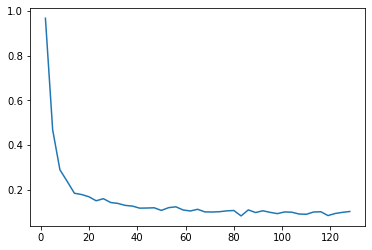

In [147]:
# Plot of test loss across our models
plt.plot(list(range(2,129,3)), loss)

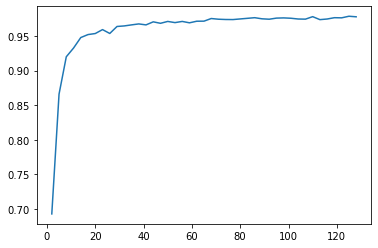

In [148]:
# Plot of test set accuracy across our many models
plt.plot(list(range(2,129,3)), acc)

### Our Best Model
Based on our experiment above it does seem like while we get diminishing returns by adding more nodes to the hidden layer we still do increase our accuracy. Our best model, as shown below, was with 125 nodes in the hidden layer.

In [165]:
# Checking what the best accuracy is
max(acc)

0.9785

In [152]:
# Checking which model has the best accuracy
np.argmax(acc)

41

In [157]:
# The number above is the model # but that doesn't tell us the number of hidden nodes
# Creating a formula below to translate into number of hidden nodes
def index_translate(n):
    a = (n*3)+2
    return a

In [163]:
# Getting the number of nodes with the highest accuracy
index_translate(np.argmax(acc))

125

## Experiment 4
***
In this section I use PCA to reduce the number of dimensions in our training set from 784 to 154 with 95% of the training variance retained. 
<br><br>
I'll then take our best model from Experiment 3 (125 hidden nodes) and train it with a 154 input layer. I'll see what result this has compared to the accuracy from Experiment 3.

In [174]:
# Creating a dataframe with the pixel data
pixel_data = {}
for k in range(0,784): 
    pixel_data[f"pix_val_{k}"] = x_train_norm[:,k]
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head()

,pix_val_0,pix_val_1,pix_val_2,pix_val_3,pix_val_4,pix_val_5,pix_val_6,pix_val_7,pix_val_8,pix_val_9,...,pix_val_774,pix_val_775,pix_val_776,pix_val_777,pix_val_778,pix_val_779,pix_val_780,pix_val_781,pix_val_782,pix_val_783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [175]:
# Checking original shape
pixel_df.shape

(60000, 784)

In [176]:
# Performing PCA and transforming
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(pixel_df)
#principalDf = pd.DataFrame(data = principalComponents
 #            , columns = ['principal component 1', 'principal component 2'])

In [183]:
# Confirming variables and variance after PCA
print("Number of Variables: ",principalComponents.shape[1])
print("Variance Explained: ", round(sum(pca.explained_variance_ratio_)*100,2))

Number of Variables:  154
Variance Explained:  95.02


In [185]:
# Creating a dataframe with the PCA data
pca_data = {}
for k in range(0,principalComponents.shape[1]): 
    pca_data[f"pca_var_{k}"] = principalComponents[:,k]
pca_df = pd.DataFrame(pca_data)
pca_df.head()

,pca_var_0,pca_var_1,pca_var_2,pca_var_3,pca_var_4,pca_var_5,pca_var_6,pca_var_7,pca_var_8,pca_var_9,...,pca_var_144,pca_var_145,pca_var_146,pca_var_147,pca_var_148,pca_var_149,pca_var_150,pca_var_151,pca_var_152,pca_var_153
0,0.486024,-1.226085,-0.096010,-2.179493,-0.107004,-0.911667,0.917635,0.626712,-1.425532,0.778130,...,-0.008031,-0.208752,-0.124823,0.002782,0.064720,-0.101186,-0.111321,0.215747,-0.078705,0.155291
1,3.967501,-1.156062,2.338907,-1.806966,-3.244128,-0.713462,-0.176538,-0.411643,0.158649,0.592047,...,0.006139,-0.249026,0.183613,0.135572,0.101697,0.109191,0.111551,0.028410,-0.048895,-0.049928
2,-0.203440,1.537929,-0.739334,2.043112,-1.202761,-0.007173,-3.368784,1.445574,-0.449156,-0.700099,...,0.153093,-0.356975,0.103849,0.051826,0.403570,-0.023994,0.291991,-0.212677,0.190038,-0.287390
3,-3.133577,-2.381278,1.073167,0.415292,-0.007132,2.743752,-1.857690,-0.264054,1.187148,0.043634,...,-0.034811,-0.135732,0.025278,0.029697,0.178856,-0.031864,0.053426,0.144262,-0.061541,-0.143248
4,-1.501067,2.864888,0.064068,-0.947710,0.385020,0.169577,-0.359500,-1.590402,0.884231,0.408333,...,0.008231,-0.040763,0.024779,-0.169255,-0.019229,0.098174,-0.113188,-0.221974,-0.129405,-0.107429


In [186]:
x_train_norm.shape

(60000, 784)

### Creating new model with PCA input data
Using the same number of nodes in the hidden layer as our best model from Experiment 3 but for this model we're using the PCA data with 154 features.

In [189]:
start = datetime.now()
# Build model
model_pca = Sequential([
    Dense(input_shape=[154], units = 125, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])

# Compile
model_pca.compile(optimizer='rmsprop', 
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])
        
# Fit
history_pca = model_pca.fit(
    principalComponents
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])


end = datetime.now()
print("Elapsed Time: ", end-start)

Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 7s 125us/sample - loss: 0.3139 - accuracy: 0.9151 - val_loss: 0.1226 - val_accuracy: 0.9667
Epoch 2/200
55020/55020 [==============================] - 5s 88us/sample - loss: 0.1218 - accuracy: 0.9646 - val_loss: 0.0916 - val_accuracy: 0.9769
Epoch 3/200
55020/55020 [==============================] - 5s 89us/sample - loss: 0.0825 - accuracy: 0.9766 - val_loss: 0.0839 - val_accuracy: 0.9773
Epoch 4/200
55020/55020 [==============================] - 5s 87us/sample - loss: 0.0615 - accuracy: 0.9826 - val_loss: 0.0775 - val_accuracy: 0.9813
Epoch 5/200
55020/55020 [==============================] - 5s 87us/sample - loss: 0.0473 - accuracy: 0.9867 - val_loss: 0.0741 - val_accuracy: 0.9807
Epoch 6/200
55020/55020 [==============================] - 5s 86us/sample - loss: 0.0370 - accuracy: 0.9899 - val_loss: 0.0800 - val_accuracy: 0.9821
Epoch 7/200
55020/55020 [=========================

### Checking Accuracy

In [190]:
# Creating a dataframe with the TEST pixel data
pixel_test_data = {}
for k in range(0,784): 
    pixel_test_data[f"pix_val_{k}"] = x_test_norm[:,k]
pixel_test_df = pd.DataFrame(pixel_test_data)

In [193]:
# PCA transformation on the TEST data
principalComponents_test = pca.transform(pixel_test_df)

In [195]:
# Checking the model accuracy with the PCA transformed test data
loss_pca, accuracy_pca = model_pca.evaluate(principalComponents_test, y_test_encoded)

10000/10000 [==============================] - 1s 51us/sample - loss: 0.0904 - accuracy: 0.9779


In [197]:
print("PCA Model Accuracy: ", round(accuracy_pca * 100, 2))
print("PCA Model Loss: ", round(loss_pca * 100, 2))

PCA Model Accuracy:  97.79
PCA Model Loss:  9.04


In [199]:
# Reviewing our results from Experiment 3 for our best model with 125 nodes
print("Base Model Accuracy: ", round(acc[np.argmax(acc)] * 100, 2))
print("Base Model Loss: ", round(loss[np.argmax(acc)] * 100, 2))

Base Model Accuracy:  97.85
Base Model Loss:  9.91


### Experiment 4 Findings:
Essentially the two methods returned the same results. We ended up with accuracies of 97.78 and 97.85 for our PCA model and our original model. The only difference between the two models was the training data fed in. In the PCA model we reduced the features from 784 to 154 while still retaining 95% of the variance. The original model used the complete 784 feature training set. I was a bit surprised to see this. I thought by losing some of the variability we'd take a hit to our accuracy. That didn't materialize in this experiment.

## EXPERIMENT 5: 
***
We use a Random Forest classifier to get the relative importance of the 784 features (pixels) of the 28x28 dimensional images in training set of MNIST images and select the top 70 features (pixels). We train our 'best' dense neural network using these 70 features and compare its performance to the the dense neural network models from EXPERIMENTS 3 and 4.

In [ ]:
pixel_data, pixel_df

In [200]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(x_train_norm,y_train_encoded)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [202]:
# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

In [203]:
# Create training and test images using just the 70 pixel locations obtained above
train_images_sm = x_train_norm[:,idx]
test_images_sm = x_test_norm[:,idx]
train_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((60000, 70), (10000, 70))

### Training our best model using the new dataset (top 70 important pixels)

In [204]:
start = datetime.now()
# Build model
model_rf = Sequential([
    Dense(input_shape=[70], units = 125, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])

# Compile
model_rf.compile(optimizer='rmsprop', 
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])
        
# Fit
history_rf = model_rf.fit(
    train_images_sm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])


end = datetime.now()
print("Elapsed Time: ", end-start)

Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 4s 67us/sample - loss: 0.5799 - accuracy: 0.8299 - val_loss: 0.3369 - val_accuracy: 0.8998
Epoch 2/200
55020/55020 [==============================] - 4s 80us/sample - loss: 0.3740 - accuracy: 0.8873 - val_loss: 0.2657 - val_accuracy: 0.9205
Epoch 3/200
55020/55020 [==============================] - 5s 87us/sample - loss: 0.3111 - accuracy: 0.9055 - val_loss: 0.2304 - val_accuracy: 0.9349
Epoch 4/200
55020/55020 [==============================] - 3s 47us/sample - loss: 0.2746 - accuracy: 0.9162 - val_loss: 0.2179 - val_accuracy: 0.9335
Epoch 5/200
55020/55020 [==============================] - 2s 38us/sample - loss: 0.2503 - accuracy: 0.9240 - val_loss: 0.2086 - val_accuracy: 0.9359ura
Epoch 6/200
55020/55020 [==============================] - 2s 36us/sample - loss: 0.2340 - accuracy: 0.9288 - val_loss: 0.2000 - val_accuracy: 0.9418
Epoch 7/200
55020/55020 [=======================

In [205]:
# Checking the model accuracy with the PCA transformed test data
loss_rf, accuracy_rf = model_rf.evaluate(test_images_sm, y_test_encoded)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.2138 - accuracy: 0.9380


### Experiment 5 Findings:
We now have 3 models to compare, each with 125 nodes in one hidden layer. The difference between the 3 models lies in the training data. In the Base and PCA models we see very similar accuracy. The PCA model actually has lower loss and probably took less time to run (we don't have a time for the base model because it was one of 43 models that were all run at the same time). The model using the top 70 pixels based on our random forest fared the worst by far. This was to be expected since we essentially have less information being fed into the model for it to learn from.

## Experiment 6
***
125 hidden nodes with sigmoid activation<br>
At this point I'm going to play around with a different activation function in the hidden layer to see what effect it has

In [208]:
start = datetime.now()
# Build model
model_6 = Sequential([
    Dense(input_shape=[784], units = 125, activation = tf.nn.sigmoid),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])

# Compile
model_6.compile(optimizer='rmsprop', 
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])
        
# Fit
history_6 = model_6.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])


end = datetime.now()
print("Elapsed Time: ", end-start)

Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 7s 134us/sample - loss: 0.3979 - accuracy: 0.8948 - val_loss: 0.1919 - val_accuracy: 0.9452
Epoch 2/200
55020/55020 [==============================] - 4s 67us/sample - loss: 0.2062 - accuracy: 0.9396 - val_loss: 0.1473 - val_accuracy: 0.9590
Epoch 3/200
55020/55020 [==============================] - 4s 67us/sample - loss: 0.1579 - accuracy: 0.9530 - val_loss: 0.1190 - val_accuracy: 0.9645ETA: 0s - loss: 0.1591 - accura
Epoch 4/200
55020/55020 [==============================] - 4s 72us/sample - loss: 0.1292 - accuracy: 0.9615 - val_loss: 0.1029 - val_accuracy: 0.9711  - ETA: 0s - loss: 0.1318  - ETA: 0s - loss: 0.1305  - ETA: 0s - loss: 0.1294 - accuracy: 0.
Epoch 5/200
55020/55020 [==============================] - 4s 77us/sample - loss: 0.1100 - accuracy: 0.9680 - val_loss: 0.0983 - val_accuracy: 0.9723
Epoch 6/200
55020/55020 [==============================] - 4s 69us/sample - 

In [210]:
# Checking the model accuracy with the test data
loss_6, accuracy_6 = model_6.evaluate(x_test_norm, y_test_encoded)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0909 - accuracy: 0.9752


## Experiment 7
***
1024 hidden nodes to show extreme overfitting
I feel based on previous results that 128 nodes is starting to get into the area of overfitting. Just to experiment I'm going to see how DRAMATICALLY overfitting compares by using 1024 hidden nodes.

In [212]:
start = datetime.now()
# Build model
model_7 = Sequential([
    Dense(input_shape=[784], units = 1024, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])

# Compile
model_7.compile(optimizer='rmsprop', 
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])
        
# Fit
history_7 = model_7.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])


end = datetime.now()
print("Elapsed Time: ", end-start)

Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 21s 378us/sample - loss: 0.1991 - accuracy: 0.9402 - val_loss: 0.1031 - val_accuracy: 0.9715
Epoch 2/200
55020/55020 [==============================] - 19s 349us/sample - loss: 0.0897 - accuracy: 0.9748 - val_loss: 0.1233 - val_accuracy: 0.9731
Epoch 3/200
55020/55020 [==============================] - 20s 355us/sample - loss: 0.0665 - accuracy: 0.9823 - val_loss: 0.0920 - val_accuracy: 0.9789
Epoch 4/200
55020/55020 [==============================] - 20s 362us/sample - loss: 0.0496 - accuracy: 0.9866 - val_loss: 0.0862 - val_accuracy: 0.9835
Epoch 5/200
55020/55020 [==============================] - 20s 369us/sample - loss: 0.0384 - accuracy: 0.9898 - val_loss: 0.1044 - val_accuracy: 0.9809
Epoch 6/200
55020/55020 [==============================] - 19s 353us/sample - loss: 0.0324 - accuracy: 0.9914 - val_loss: 0.1049 - val_accuracy: 0.9831
Elapsed Time:  0:01:59.405859


In [214]:
# Checking the model accuracy with the test data
loss_7, accuracy_7 = model_7.evaluate(x_test_norm, y_test_encoded)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0969 - accuracy: 0.9796


In [215]:
losses_7 = history_7.history['loss']
accs_7 = history_7.history['accuracy']
val_losses_7 = history_7.history['val_loss']
val_accs_7 = history_7.history['val_accuracy']
epochs_7 = len(losses_7)

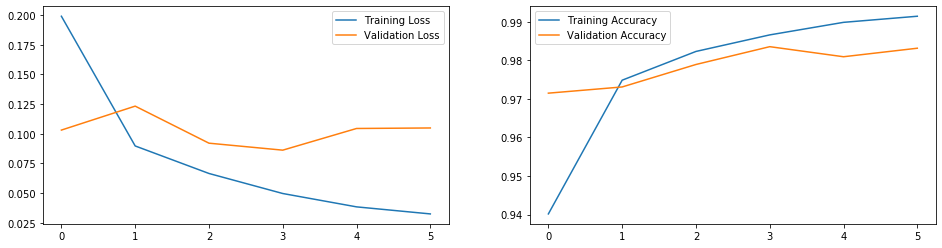

In [217]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_7, accs_7], [val_losses_7, val_accs_7], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_7), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_7), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Experiment 8
***
125 hidden node with different optiizer<br>
Starting with this experiment and continuing into the next 3 I'll play around with the optimizer to see what effect it has on the results. This experiment will change the optimizer from ***rmsprop*** to ***adam***.

In [218]:
start = datetime.now()
# Build model
model_8 = Sequential([
    Dense(input_shape=[784], units = 125, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])

# Compile
model_8.compile(optimizer='adam', 
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])
        
# Fit
history_8 = model_8.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])


end = datetime.now()
print("Elapsed Time: ", end-start)

Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 4s 75us/sample - loss: 0.2737 - accuracy: 0.9214 - val_loss: 0.1215 - val_accuracy: 0.9647 ETA: 0s - loss: 0.2926 
Epoch 2/200
55020/55020 [==============================] - 3s 56us/sample - loss: 0.1220 - accuracy: 0.9638 - val_loss: 0.1001 - val_accuracy: 0.9717A: 0s - loss: 0.1220 - accuracy: 0.96
Epoch 3/200
55020/55020 [==============================] - 3s 59us/sample - loss: 0.0824 - accuracy: 0.9756 - val_loss: 0.0846 - val_accuracy: 0.97470818 - accuracy:  - ETA: 0s - loss: 0.082 - ETA: 0s - loss: 0.0818 - accu
Epoch 4/200
55020/55020 [==============================] - 3s 56us/sample - loss: 0.0617 - accuracy: 0.9811 - val_loss: 0.0736 - val_accuracy: 0.9801
Epoch 5/200
55020/55020 [==============================] - 3s 58us/sample - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.0744 - val_accuracy: 0.9785ETA: 1s - loss: 0.0429 - ac - ETA: 1s - l - ETA: 0s - loss: 0.0459  

In [219]:
# Checking the model accuracy with the test data
loss_8, accuracy_8 = model_8.evaluate(x_test_norm, y_test_encoded)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0769 - accuracy: 0.9775


In [220]:
losses_8 = history_8.history['loss']
accs_8 = history_8.history['accuracy']
val_losses_8 = history_8.history['val_loss']
val_accs_8 = history_8.history['val_accuracy']
epochs_8 = len(losses_8)

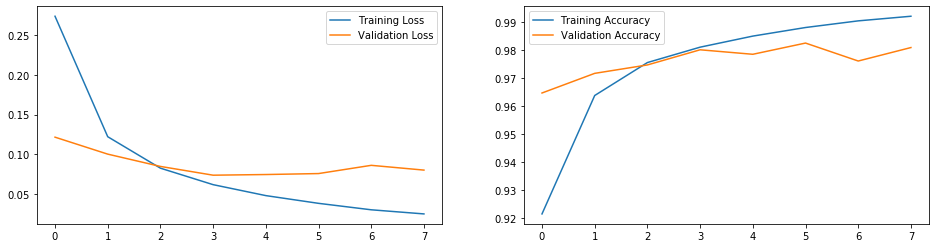

In [221]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_8, accs_8], [val_losses_8, val_accs_8], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_8), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_8), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Experiment 9
***
125 hidden node with RMSPROP and different momentum<br>
I'll revert back to RMSPROP optimizer but start looking the results of changing the momentum.

In [222]:
start = datetime.now()
# Build model
model_9 = Sequential([
    Dense(input_shape=[784], units = 125, activation = tf.nn.relu),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])

# Compile
model_9.compile(optimizer=tf.keras.optimizers.RMSprop(momentum=0.9),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])
        
# Fit
history_9 = model_9.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.083
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])


end = datetime.now()
print("Elapsed Time: ", end-start)

Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 4s 69us/sample - loss: 0.2756 - accuracy: 0.9279 - val_loss: 0.1807 - val_accuracy: 0.9548  - ETA: 1s - loss: 0.3007 - accuracy: 0.91 - ETA
Epoch 2/200
55020/55020 [==============================] - 3s 55us/sample - loss: 0.1853 - accuracy: 0.9601 - val_loss: 0.1536 - val_accuracy: 0.9679
Epoch 3/200
55020/55020 [==============================] - 3s 58us/sample - loss: 0.1688 - accuracy: 0.9680 - val_loss: 0.1925 - val_accuracy: 0.969367 - accuracy: 0.96 - ETA: 0s - loss: 0.166 - ETA: 0s - loss: 0.1679 - accu
Epoch 4/200
55020/55020 [==============================] - 3s 60us/sample - loss: 0.1515 - accuracy: 0.9716 - val_loss: 0.1976 - val_accuracy: 0.9733uracy: 0.
Epoch 5/200
55020/55020 [==============================] - 3s 54us/sample - loss: 0.1502 - accuracy: 0.9755 - val_loss: 0.2208 - val_accuracy: 0.9705
Epoch 6/200
55020/55020 [==============================] - 3s 56us/s

In [223]:
# Checking the model accuracy with the test data
loss_9, accuracy_9 = model_9.evaluate(x_test_norm, y_test_encoded)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.2635 - accuracy: 0.9671


In [225]:
losses_9 = history_9.history['loss']
accs_9 = history_9.history['accuracy']
val_losses_9 = history_9.history['val_loss']
val_accs_9 = history_9.history['val_accuracy']
epochs_9 = len(losses_9)

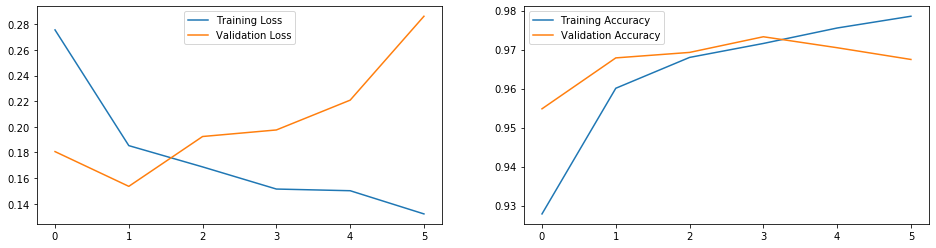

In [226]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_9, accs_9], [val_losses_9, val_accs_9], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_9), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_9), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Experiment 10
***
125 hidden node with RMSPROP and different learning rate<br>
Similar to experiment 9 but I'll change the learning rate

In [227]:
    start = datetime.now()
    # Build model
    model_10 = Sequential([
        Dense(input_shape=[784], units = 125, activation = tf.nn.relu),
        Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)])

    # Compile
    model_10.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                    loss = 'categorical_crossentropy',
                    metrics=['accuracy'])

    # Fit
    history_10 = model_10.fit(
        x_train_norm
        ,y_train_encoded
        ,epochs = 200
        ,validation_split=0.083
        ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])


    end = datetime.now()
    print("Elapsed Time: ", end-start)

Train on 55020 samples, validate on 4980 samples
Epoch 1/200
55020/55020 [==============================] - 4s 77us/sample - loss: 0.6416 - accuracy: 0.8456 - val_loss: 0.2680 - val_accuracy: 0.9307
Epoch 2/200
55020/55020 [==============================] - 4s 65us/sample - loss: 0.2990 - accuracy: 0.9172 - val_loss: 0.2062 - val_accuracy: 0.9440
Epoch 3/200
55020/55020 [==============================] - 3s 63us/sample - loss: 0.2464 - accuracy: 0.9312 - val_loss: 0.1795 - val_accuracy: 0.9512
Epoch 4/200
55020/55020 [==============================] - 4s 64us/sample - loss: 0.2139 - accuracy: 0.9395 - val_loss: 0.1592 - val_accuracy: 0.9578
Epoch 5/200
55020/55020 [==============================] - 4s 64us/sample - loss: 0.1908 - accuracy: 0.9454 - val_loss: 0.1468 - val_accuracy: 0.9600 0.94
Epoch 6/200
55020/55020 [==============================] - 4s 64us/sample - loss: 0.1731 - accuracy: 0.9506 - val_loss: 0.1374 - val_accuracy: 0.9627
Epoch 7/200
55020/55020 [=====================

In [228]:
# Checking the model accuracy with the test data
loss_10, accuracy_10 = model_10.evaluate(x_test_norm, y_test_encoded)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.1140 - accuracy: 0.9679


In [229]:
losses_10 = history_10.history['loss']
accs_10 = history_10.history['accuracy']
val_losses_10 = history_10.history['val_loss']
val_accs_10 = history_10.history['val_accuracy']
epochs_10 = len(losses_10)

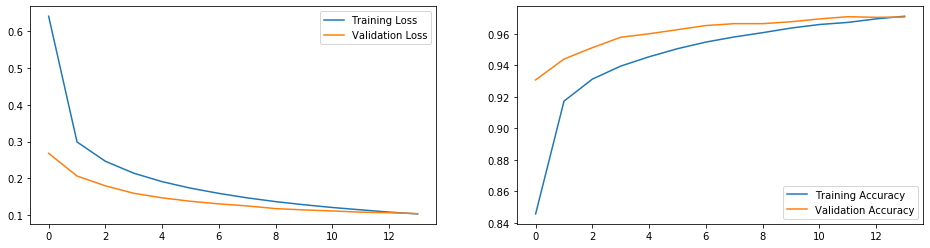

In [230]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses_10, accs_10], [val_losses_10, val_accs_10], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs_10), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs_10), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

# Final Findings
***
Here we take a look at all of our outputs and compile the results of all of our experiments

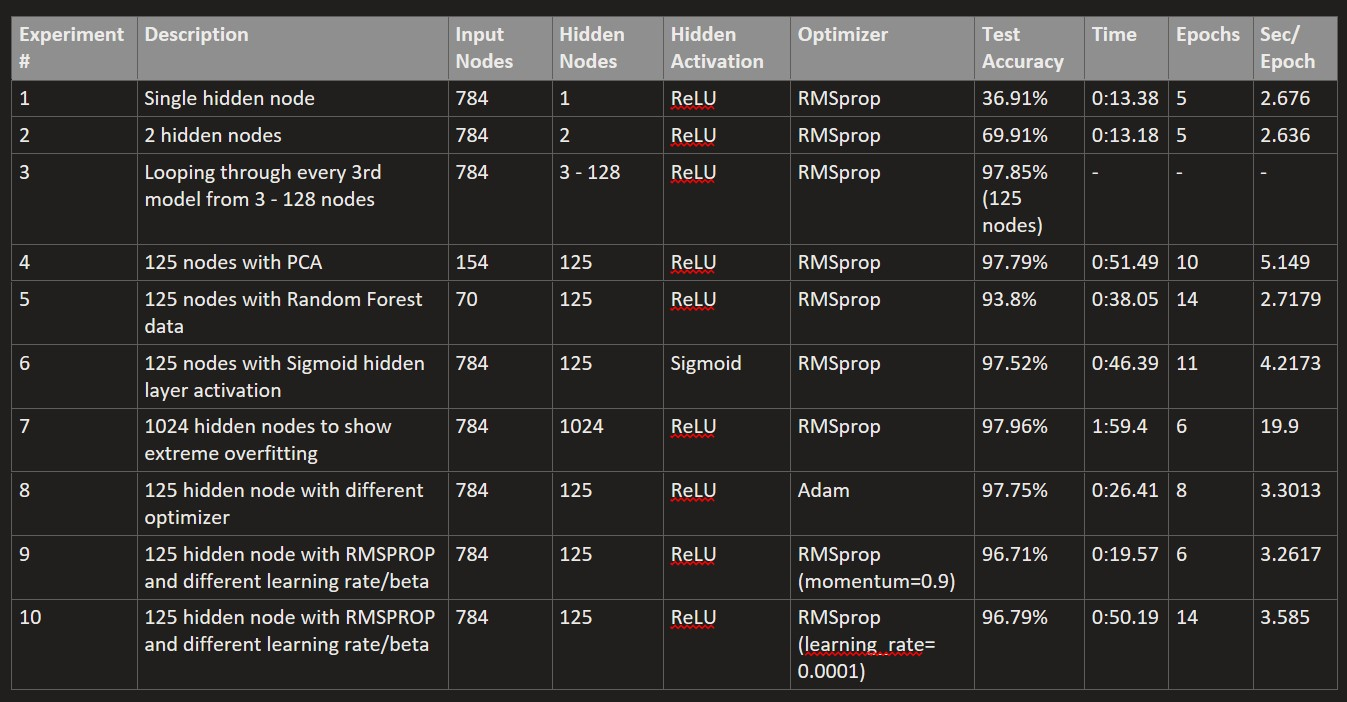

In [236]:
# Showing tabulated results
display.Image("../images/assignment1_results.jpg")